## Observations and Insights 

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

study_data_complete_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
study_data_complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [80]:
# Checking the number of mice.
study_data_complete_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [81]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
clean_data_df = study_data_complete_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_data_df
clean_data_df.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

In [82]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [83]:
# Checking the number of mice in the clean DataFrame.
clean_data_df.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [84]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Identify the diferrent Drug Regimen along with the total tumer volume for each using .groupby
drug_grouped = clean_data_df.groupby(["Drug Regimen"])
drug_grouped

#create  variables


#create  mean 
drug_mean = drug_grouped["Tumor Volume (mm3)"].mean()

#Create  median 
drug_median = drug_grouped["Tumor Volume (mm3)"].median()

#Create  variance 
drug_variance = drug_grouped["Tumor Volume (mm3)"].var()

#create  standard deviation 
drug_std = drug_grouped["Tumor Volume (mm3)"].std()

#create SEM
drug_sem = drug_grouped["Tumor Volume (mm3)"].sem()

summary_stats = pd.DataFrame({"Mean": drug_mean, "Median":drug_median, "Variance":drug_variance, 
                              "Standard Deviation": drug_std, "SEM": drug_sem})

summary_stats




# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [85]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# mean using groupby function
vol_data_df = clean_data_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)" :["mean","sem","median","var","std"]})
                                                                                
vol_data_df

Tumor Volume (mm3)                                          
                           mean       sem     median        var       std
Drug Regimen                                                             
Capomulin             40.675741  0.329346  41.557809  24.947764  4.994774
Ceftamin              52.591172  0.469821  51.776157  39.290177  6.268188
Infubinol             52.884795  0.492236  51.820584  43.128684  6.567243
Ketapril              55.235638  0.603860  53.698743  68.553577  8.279709
Naftisol              54.331565  0.596466  52.509285  66.173479  8.134708
Placebo               54.033581  0.581331  52.288934  61.168083  7.821003
Propriva              52.393463  0.525862  50.909965  43.138803  6.568014
Ramicane              40.216745  0.320955  40.673236  23.486704  4.846308
Stelasyn              54.233149  0.573111  52.431737  59.450562  7.710419
Zoniferol             53.236507  0.516398  51.818479  48.533355  6.966589

## Bar and Pie Charts

In [86]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot. 
mice_per_regimen_df = clean_data_df.groupby("Drug Regimen")["Mouse ID"].count()
mice_per_regimen_df


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

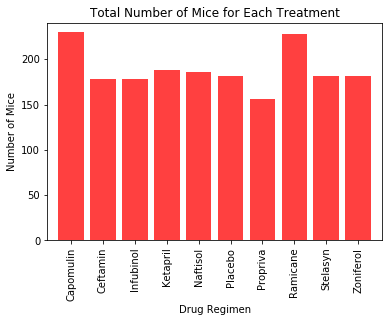

In [87]:
mice = [230, 178, 178, 188, 186, 181, 156, 228, 181,182]
x_axis = np.arange(len(mice))
plt.bar(x_axis, mice, color='r', alpha=0.75, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol",
                           "Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"],rotation ="vertical")
plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice)+10)

plt.title("Total Number of Mice for Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

In [88]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
# Filter the DataFrame down only to those columns to chart


mice_per_regimen_df = clean_data_df.groupby("Drug Regimen")["Mouse ID"].count()
mice_per_regimen_df

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Number of Mice')

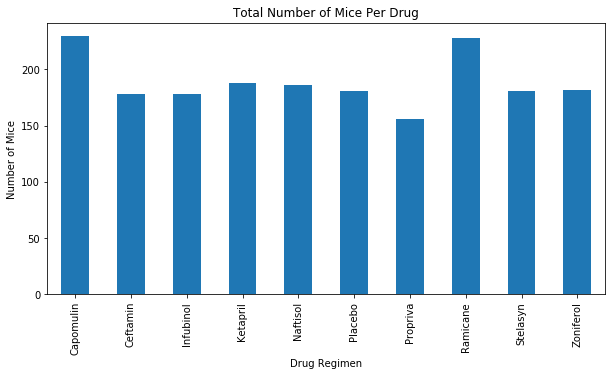

In [89]:
clean_data_df.groupby(['Drug Regimen']).size().plot(kind="bar", figsize=(10,5))

# Set a title for the chart
plt.title("Total Number of Mice Per Drug")
plt.ylabel("Number of Mice")


In [90]:
#Group by "Mouse ID" and "Sex" to find the unique number of male vs female
#count of male versus female
mouse_gender = clean_data_df.groupby("Sex").count()
mouse_gender

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,930,930,930,930,930,930,930
Male,958,958,958,958,958,958,958


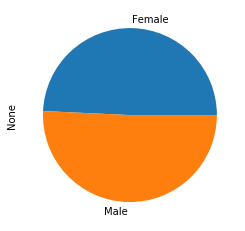

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
clean_data_df.groupby(['Sex']).size().plot.pie()
colors = ['blue', 'red']


In [92]:
#count of male versus female
mouse_gender = clean_data_df.groupby("Sex").count()
mouse_gender


,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,930,930,930,930,930,930,930
Male,958,958,958,958,958,958,958


([<matplotlib.patches.Wedge at 0x1f1d36e28c8>,
 [Text(-0.7265028750894215, -0.8259501029038041, 'Females'),
  Text(0.7265029524204479, 0.8259500348836922, 'Males')],
 [Text(-0.3962742955033208, -0.45051823794752943, '49.3%'),
  Text(0.39627433768388065, 0.4505182008456502, '50.7%')])

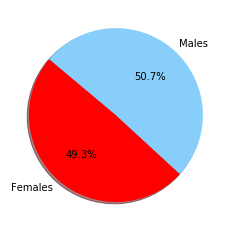

In [93]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Females", "Males"]

# The values of each section of the pie chart
sizes = [930,958]

# The colors of each section of the pie chart
colors = ["red","lightskyblue"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


## Quartiles, Outliers and Boxplots

In [94]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers.
# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# Quantitatively determine capomulin outliers
# treatments - Capomulin, Ramicane, Infubinol, and Ceftamin


capo_df = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Capomulin",:]
rami_df = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Ramicane", :]
infu_df = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Infubinol", :]
cefta_df = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Ceftamin", :]
capo_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [95]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Best drugs from the data frame

capomulin_last = capo_df.groupby('Mouse ID').max()['Timepoint']
capomulin_last_vol = pd.DataFrame(capomulin_last)
capomulin_last_merge = pd.merge(capomulin_last_vol, clean_data_df, on=("Mouse ID","Timepoint"),how="left")
capomulin_last_merge.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [96]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
cap_tumors = capomulin_last_merge["Tumor Volume (mm3)"]

quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#print(f"The lower quartile of temperatures is: {lowerq}")
#print(f"The upper quartile of temperatures is: {upperq}")
#print(f"The interquartile range of temperatures is: {iqr}")
#print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.


In [97]:
ramicane_last = rami_df.groupby('Mouse ID').max()['Timepoint']
ramicane_last_vol = pd.DataFrame(ramicane_last)
ramicane_last_merge = pd.merge(ramicane_last_vol, clean_data_df, on=("Mouse ID","Timepoint"),how="left")
ramicane_last_merge.head(10)



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2
5,c758,45,Ramicane,Male,9,17,33.397653,1
6,d251,45,Ramicane,Female,8,19,37.311236,2
7,e662,45,Ramicane,Male,8,24,40.659006,2
8,g791,45,Ramicane,Male,11,16,29.128472,1
9,i177,45,Ramicane,Male,10,18,33.562402,3


In [98]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
ram_tumors = ramicane_last_merge["Tumor Volume (mm3)"]

quartiles2 = ram_tumors.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Ramicane potential outliers could be values below {lower_bound2} and above {upper_bound2} could be outliers.")

Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.


In [99]:


infubinol_last = infu_df.groupby('Mouse ID').max()['Timepoint']
infubinol_last_vol = pd.DataFrame(infubinol_last)
infubinol_last_merge = pd.merge(infubinol_last_vol, clean_data_df, on=("Mouse ID","Timepoint"),how="left")
infubinol_last_merge.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [109]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
infu_tumors = infubinol_last_merge["Tumor Volume (mm3)"]

quartiles3 = infu_tumors.quantile([.25,.5,.75])
lowerq3 = quartiles2[0.25]
upperq3 = quartiles2[0.75]
iqr3 = upperq3-lowerq3

lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print(f"Infubinol potential outliers could be values below {lower_bound3} and above {upper_bound3} could be outliers.")

Infubinol potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


In [101]:


ceftamin_last = cefta_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_last_vol = pd.DataFrame(ceftamin_last)
ceftamin_last_merge = pd.merge(ceftamin_last_vol, clean_data_df, on=("Mouse ID","Timepoint"),how="left")
ceftamin_last_merge.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [110]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
cefta_tumors = ceftamin_last_merge["Tumor Volume (mm3)"]

quartiles4 = cefta_tumors.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4

lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"Ceftamin potential outliers could be values below {lower_bound4} and above {upper_bound4} could be outliers.")

Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


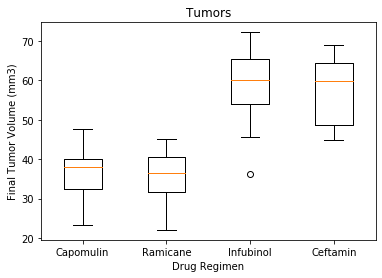

In [111]:
# Generate a box plot of the final tumor volume of each mouse across four regimens 
drugs_to_plot = [cap_tumors, ram_tumors, infu_tumors, cefta_tumors]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(drugs_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('boxplot')
plt.show()

In [104]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    

## Line and Scatter Plots

In [112]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Create a group based on the values in the 'drug regimen' column
capo_group_df = capo_df.loc[cap_df["Mouse ID"] == "s185",:]
capo_group_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


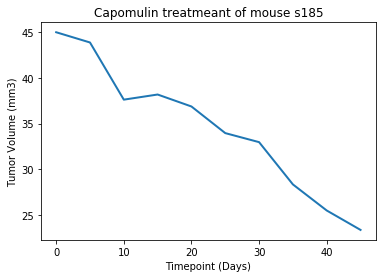

In [113]:
x_axis_time = capo_group_df["Timepoint"]
tumor_volume = capo_group_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse s185')
plt.plot(x_axis_time, tumor_volume,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

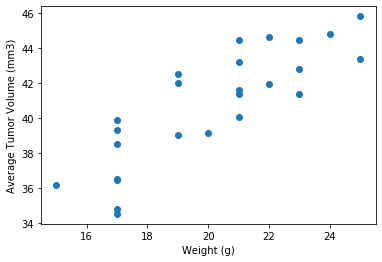

In [114]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_avg = capo_df.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()


## Correlation and Regression

In [47]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation=round(st.pearsonr(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")



NameError: name 'st' is not defined

In [48]:
stat_values=st.linregress(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
stat_values


NameError: name 'st' is not defined

In [ ]:
#capomulin_avg['Weight (g)']

mslope =
bintercept = 

In [46]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
y_values = capomulin_avg['Weight (g)']*mslope+bintercept
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.plot(capomulin_avg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('linear_regression')
plt.show()

NameError: name 'mslope' is not defined